In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import statsmodels.stats.api as sms
import matplotlib as mpl
from math import ceil


In [2]:
pokemon = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'\
                      , on_bad_lines='skip')  # Загрузим датасет



* pid: Numeric - ID покемона
* HP: Numeric - Очки здоровья
* Attack: Numeric - Сила обычной атаки
* Defense: Numeric - Сила обычной защиты
* Sp. Atk: Numeric - Сила специальной атаки
* Sp. Def: Numeric - Сила специальной защиты
* Speed: Numeric - Скорость движений
* Legendary: Boolean - «True», если покемон редкий
* Class 1: Categorical - Класс покемона
* Class 2: Categorical - Класс покемона


In [3]:
pokemon.head()

# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [4]:
pokemon.pid.value_counts().count()

800

In [5]:
# Заменяем пробелы на _

pokemon.columns = [col.strip().replace(' ', '_') for col in pokemon.columns]

In [6]:
# Удалим столбец с pid, он нам не нужен
pokemon.drop(labels='pid', axis=1, inplace=True)

In [7]:
pokemon

,Name,Class_1,Class_2,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [8]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       799 non-null    object
 1   Class_1    800 non-null    object
 2   Class_2    414 non-null    object
 3   HP         800 non-null    int64 
 4   Attack     800 non-null    int64 
 5   Defense    800 non-null    int64 
 6   Sp._Atk    800 non-null    int64 
 7   Sp._Def    800 non-null    int64 
 8   Speed      800 non-null    int64 
 9   Legendary  800 non-null    bool  
dtypes: bool(1), int64(6), object(3)
memory usage: 57.2+ KB


In [9]:
pokemon.describe()

,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [10]:
len(pokemon.Class_2.value_counts()), len(pokemon.Class_1.value_counts())

(18, 18)

In [11]:
p_columns = pokemon.describe().columns.to_list()
p_columns

['HP', 'Attack', 'Defense', 'Sp._Atk', 'Sp._Def', 'Speed']

Нулевая гипотеза:  HP=Attack=Defense=Sp._Atk=Sp._Def=Speed
Альтернативная гипотеза:  !(HP=Attack=Defense=Sp._Atk=Sp._Def=Speed)
Результат: 
отклоняем нулевую гипотезу
Полученное f-значение 13.031283690715513


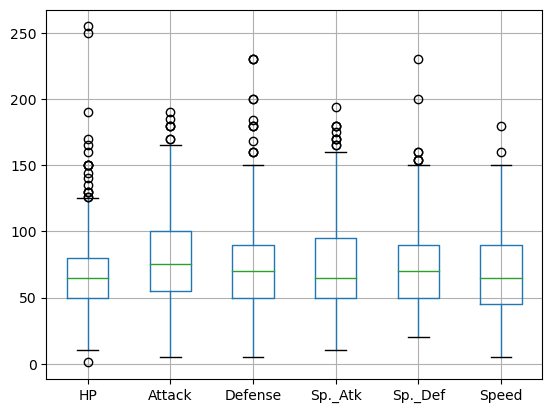

In [12]:
# Проведем дисперсионный анализ

pokemon[p_columns].boxplot()

print ('Нулевая гипотеза: ', '='.join(pokemon[p_columns]))
print ('Альтернативная гипотеза: ', f'!({"=".join(pokemon[p_columns])})')
       
# Общая средняя
grand_mean = pokemon[p_columns].values.flatten().mean()

# Общая сумма квадратов sst = ssb + ssw
sst = sum( (val - grand_mean)**2 for val in pokemon[p_columns].values.flatten() )

# Отклонение групповых средних от общей средней
ssb = sum( pokemon[group].size * (group_mean - grand_mean)** 2 for group, group_mean in pokemon[p_columns]\
                                                                                               .mean().items())

# Отклонения значений внутри группы от средней группы
ssw = sum( sum ((x - group_mean)**2 for x in pokemon[group] ) for group, group_mean in pokemon[p_columns]\
                                                                                              .mean().items())

groups = pokemon[p_columns].shape[1]

# CBOI
dfb = groups - 1
dfw = pokemon[p_columns].size - groups

# Межгрупповой средний квадрат
mssb = ssb/dfb

# Внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw
p = st.f.sf(f_value, dfb, dfw)
print ('Результат: ' )

if p < 0.05:
    print('отклоняем нулевую гипотезу' )
else:
    print('HE отклоняем нулевую гипотезу' ) 
print(f"Полученное f-значение {f_value}")

# Задание № 1:
Профессор Оук подозревает, что покемоны в классе Grass имеют более сильную обычную атаку, чем покемоны в классе Rock. Проверьте, прав ли он, и убедите его в своём выводе статистически.

Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их.
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

In [13]:
poke_grass = pokemon.query("Class_1 == 'Grass' & Class_2 != 'Rock' | Class_2 == 'Grass' & Class_1 != 'Rock' ")\
                    .sample(n=56, random_state=12)
poke_grass.head()

,Name,Class_1,Class_2,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Legendary
570,Pansage,Grass,NaN,50,53,48,53,48,64,False
52,Parasect,Bug,Grass,60,95,80,60,80,30,False
122,Tangela,Grass,NaN,65,55,115,100,40,60,False
51,Paras,Bug,Grass,35,70,55,45,55,25,False
168,Meganium,Grass,NaN,80,82,100,83,100,80,False


In [14]:
poke_rock = pokemon.query("Class_1 == 'Rock' & Class_2 != 'Grass' | Class_2 == 'Rock' & Class_1 != 'Grass' ")
poke_rock.head()

,Name,Class_1,Class_2,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Legendary
80,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,Golem,Rock,Ground,80,120,130,55,65,45,False
103,Onix,Rock,Ground,35,45,160,30,45,70,False
119,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False


In [15]:
len(poke_grass), len(poke_rock)

(56, 56)

In [16]:
# Проверяем нормальное ли распределение

for poke in [poke_grass, poke_rock]:

    stat, p = st.shapiro(poke.Attack)
    
    
# H0 : (нулевая гипотеза) Распределение нормальное.
# H1 : (альтернативная гипотеза) Распределение не нормальное


    print(f'Статистика= {stat:.4f}, p= {p: .4f}')

    if p > 0.05:
        print('Не отклоняем нулевую гипотезу, распределение, вероятно, нормальное' )
    else:
        print('Отклоняем нулевую гипотезу, распределение, вероятно, не нормально' )

Статистика= 0.9700, p=  0.1767
Не отклоняем нулевую гипотезу, распределение, вероятно, нормальное
Статистика= 0.9824, p=  0.5855
Не отклоняем нулевую гипотезу, распределение, вероятно, нормальное


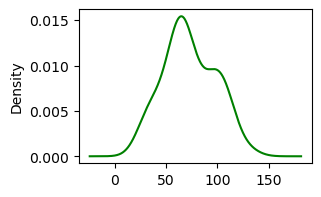

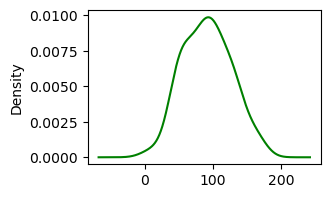

In [17]:
# Проверим на графике распределение
# На первом графике есть отклонение, но не сильное

for poke in [poke_grass, poke_rock]:
    plt.figure(figsize=(3,2))
    poke.Attack.plot(kind='density', color='green')
    plt.show()

Прежде чем использовать t-тест, необходимо проверить равенство дисперссий. Сделаем это с помощью F-теста. Используем собстенную функцию.

In [18]:
# Тест Фишера - определяем зависимы ли группы между собой

def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size - 1
    dun = group2.size - 1
    p_value = 1 - st.f.cdf(f, nun, dun)
    return f, p_value

In [19]:
stat, p = f_test(poke_rock.Attack, poke_grass.Attack)
                                             
print(f'Статистика= {stat:.4f}, p= {p: .4f}')
      
# H0 : (нулевая гипотеза) Две переменные независимы.
# H1 : (альтернативная гипотеза) Две переменные не являются независимыми.
    
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковы или независимы' )
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются или не являются независимыми' )

Статистика= 1.9477, p=  0.0074
Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются или не являются независимыми


Используем Т-критерий Стьюдента

In [20]:
stat, p = st.ttest_ind(poke_rock.Attack, poke_grass.Attack, equal_var=False)
# equal_var=True - используется при независимых группах

print (f'Статистика= {stat: .4f}, p= {p: .4f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые ' )
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются' )

Статистика=  3.3144, p=  0.0013
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [21]:
# тест с односторонней альтернативой применяется с помощью alternative?

stat, p = st.ttest_ind(poke_rock.Attack, poke_grass.Attack, equal_var=False, alternative='greater')
# equal_var=True - используется при независимых группах

print (f'Статистика= {stat: .4f}, p= {p: .4f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые ' )
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются' )

Статистика=  3.3144, p=  0.0006
Отклоняем нулевую гипотезу, средние, вероятно, различаются


In [22]:
poke_rock.Attack.mean() > poke_grass.Attack.mean()

True

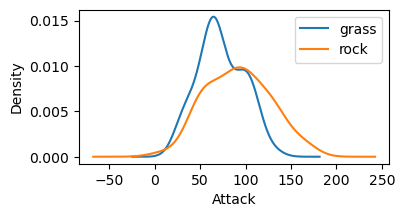

In [23]:
plt.figure(figsize=(4, 2))
poke_grass.Attack.plot(kind='density')
poke_rock.Attack.plot(kind='density')
plt.xlabel('Attack')
plt.legend(['grass','rock'])
plt.show()

Вывод: Наше значение р близко к нулю, поэтому мы отвергаем нулевую гипотезу о том, что средние значения двух выборок одинаковые. То есть существует статистически значимая разница между силой обычной атаки у Grass и Rock.  Среднее значение выборки Rock больше чем среднее значение выборки Grass, т.е. у покемонов Rock имеет более сильную обычную атаку по сравнению с Grass и професор Оук ошибается

### Задание 2
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос, а правда ли, что покемоны в классе Water в среднем быстрее, чем покемоны в классе Normal.
Проверьте, прав ли он, и убедите его в своём выводе статистически.

Примечание: если есть покемоны, которые относятся к обоим классам, выбросьте их. Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [24]:
poke_water = pokemon.query("Class_1 == 'Water' & Class_2 != 'Normal' | Class_2 == 'Water' & Class_1 != 'Normal' ")
poke_water.head()

,Name,Class_1,Class_2,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Legendary
9,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,Blastoise,Water,NaN,79,83,100,85,105,78,False
12,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False
59,Psyduck,Water,NaN,50,52,48,65,50,55,False


In [25]:
poke_normal = pokemon.query("Class_1 == 'Normal' & Class_2 != 'Water' | Class_2 == 'Normal' & Class_1 != 'Water' ")
poke_normal.head()

,Name,Class_1,Class_2,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Legendary
20,Pidgey,Normal,Flying,40,45,40,35,35,56,False
21,Pidgeotto,Normal,Flying,63,60,55,50,50,71,False
22,Pidgeot,Normal,Flying,83,80,75,70,70,101,False
23,Mega Pidgeot,Normal,Flying,83,80,80,135,80,121,False
24,Rattata,Normal,NaN,30,56,35,25,35,72,False


In [26]:
len(poke_water), len(poke_normal)

(125, 101)

In [27]:
# Тест Фишера - определяем зависимы ли группы между собой

def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size - 1
    dun = group2.size - 1
    p_value = 1 - st.f.cdf(f, nun, dun)
    return f, p_value

In [28]:
stat, p = f_test(poke_normal.Speed, poke_water.Speed)
                                             
print(f'Статистика= {stat:.4f}, p= {p: .4f}')
      
# H0 : (нулевая гипотеза) Две переменные независимы.
# H1 : (альтернативная гипотеза) Две переменные не являются независимыми.
    
    
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые' )
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются' )

Статистика= 1.5615, p=  0.0093
Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются


In [29]:
# Поскольку группы не является независимыми, используем тест Уэлча

stat, p = st.ttest_ind(poke_normal.Speed, poke_water.Speed, equal_var=False)

print (f'Статистика= {stat: .4f}, p= {p: .4f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые ' )
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются' )

Статистика=  2.1012, p=  0.0369
Отклоняем нулевую гипотезу, средние, вероятно, различаются


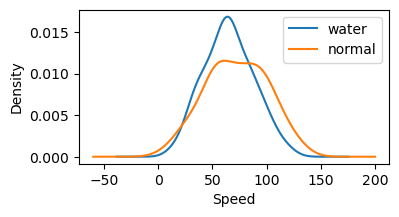

In [30]:
# По графику видно, что у класса water скорость больше

plt.figure(figsize=(4, 2))
poke_water.Speed.plot(kind='density')
poke_normal.Speed.plot(kind='density')
plt.xlabel('Speed')
plt.legend(['water','normal'])
plt.show()

Вывод: Наше значение р близко к альфе, поэтому мы отвергаем нулевую гипотезу о том, что средние значения двух выборок одинаковые. То есть существует статистически значимая разница между средней скоростью класса Water и Normal

### Задание 3
Профессор Оук тот еще безумец. Он изобрёл сыворотку, способную ускорить покемона. Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив treathed_pokemon. Проверьте, работает ли вообще его сыворотка, убедите всех в своём выводе статистически.

Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

In [31]:
treathed_pokemon_t = pokemon.query("Name == ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']")
treathed_pokemon_t.head()

,Name,Class_1,Class_2,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Legendary
19,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [32]:
treathed_pokemon_c = pokemon.loc[ (pokemon.Name.str.contains('Beedrill|Alakazam|Deoxys|Lopunny', case=False) == True) & \
                                  (pokemon.Name.str.contains('Mega', case=False) == False) & \
                                  (pokemon.Name.str.contains('Deoxys Normal Forme', case=False) == False) ].sample(n=4)
treathed_pokemon_c

,Name,Class_1,Class_2,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Legendary
431,Deoxys Speed Forme,Psychic,NaN,50,95,90,95,90,180,True
475,Lopunny,Normal,NaN,65,76,84,54,96,105,False
429,DeoxysAttack Forme,Psychic,NaN,50,180,20,180,20,150,True
70,Alakazam,Psychic,NaN,55,50,45,135,95,120,False


In [33]:
# Смотрим зависимость 2 групп

stat, p = f_test(treathed_pokemon_c.Speed, treathed_pokemon_t.Speed)
                                             
print(f'Статистика= {stat:.4f}, p= {p: .4f}')
      
# H0 : (нулевая гипотеза) Две переменные независимы.
# H1 : (альтернативная гипотеза) Две переменные не являются независимыми.
    
    
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые' )
else:
    print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются' )

Статистика= 22.1250, p=  0.0151
Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются


In [34]:
# Поскольку группы не является независимыми, используем тест Уэлча

stat, p = st.ttest_ind(treathed_pokemon_c.Speed, treathed_pokemon_t.Speed, equal_var=False)

print (f'Статистика= {stat: .4f}, p= {p: .4f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые ' )
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются' )

Статистика= -0.3676, p=  0.7357
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые 


In [35]:
# перепроверим на T-критерии Стьюдента при парных выборок

stat, p = st.ttest_rel(treathed_pokemon_t.Speed,treathed_pokemon_c.Speed)

print (f'Статистика= {stat: .4f}, p= {p: .4f}')

# H0 : (нулевая гипотеза) Средства образцов равны.
# H1 : (альтернативная гипотеза) Средства образцов не равны.
    

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, образцы, вероятно, равны ' )
else:
    print('Отклоняем нулевую гипотезу, образцы, вероятно, не равны' )

Статистика=  0.3758, p=  0.7321
Не отклоняем нулевую гипотезу, образцы, вероятно, равны 


Вывод: Наше значение р больше альфы, поэтому мы не отвергаем нулевую гипотезу о том, что при введении сыворотки покемонам их скорость станет выше

### Задание 4
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик HP,Attack,Defense у легендарных покемонов выше, чем у других покемонов?

А произведение этих же параметров?
Найдите ответы на эти вопросы и убедите всех в своём выводе статистически.

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

In [36]:
poke_lega = pokemon.query("Legendary == True")
poke_lega.head()

,Name,Class_1,Class_2,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Legendary
156,Articuno,Ice,Flying,90,85,100,95,125,85,True
157,Zapdos,Electric,Flying,90,90,85,125,90,100,True
158,Moltres,Fire,Flying,90,100,90,125,85,90,True
162,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True
163,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True


In [37]:
poke_norm = pokemon.query("Legendary != True").sample(n=65, random_state=17)
poke_norm.head()

,Name,Class_1,Class_2,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Legendary
740,Skiddo,Grass,NaN,66,65,48,62,57,52,False
533,Wash Rotom,Electric,Water,50,65,107,105,107,86,False
296,Seedot,Grass,NaN,40,40,50,30,30,30,False
510,Abomasnow,Grass,Ice,90,92,75,92,85,60,False
566,Herdier,Normal,NaN,65,80,65,35,65,60,False


In [38]:
# Чтобы получить ответ на вопрос професора нужно, чтобы размер выборки был равен

poke_lega.shape[0], poke_norm.shape[0]

(65, 65)

In [39]:
# Проверим различие выборки между собой с помощью F-теста

def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size - 1
    dun = group2.size - 1
    p_value = 1 - st.f.cdf(f, nun, dun)
    return f, p_value

In [40]:
characteristics = ['HP', 'Attack', 'Defense']

In [41]:
for char in characteristics:
    
    stat, p = f_test(poke_lega[char], poke_norm[char])

    print(f'Статистика= {stat:.4f}, p= {p: .4f}')

    # H0 : (нулевая гипотеза) Две переменные независимы.
    # H1 : (альтернативная гипотеза) Две переменные не являются независимыми.

    if p > 0.05:
        print(f'Не отклоняем нулевую гипотезу, дисперссии {char}, вероятно, одинаковы или независимы' )
    else:
        print(f'Отклоняем нулевую гипотезу, дисперссии {char}, вероятно, различаются или не являются независимыми' )

Статистика= 1.3875, p=  0.0964
Не отклоняем нулевую гипотезу, дисперссии HP, вероятно, одинаковы или независимы
Статистика= 1.2720, p=  0.1691
Не отклоняем нулевую гипотезу, дисперссии Attack, вероятно, одинаковы или независимы
Статистика= 1.2732, p=  0.1682
Не отклоняем нулевую гипотезу, дисперссии Defense, вероятно, одинаковы или независимы


In [42]:
# Сумма всех характеристик больше у легендарных героев

list_w_char = []
list_w_char_lega = []

for char in characteristics:
    list_w_char.append(poke_norm[char].sum())
    list_w_char_lega.append(poke_lega[char].sum())
    
print(sum(list_w_char_lega) > sum(list_w_char))

True


In [43]:
# Произведение также больше у легендарных героев

from functools import reduce


list_w_char = []
list_w_char_lega = []

for char in characteristics:
    prod_lega = reduce(lambda a, b : a * b, poke_lega[char])
    prod_norm = reduce(lambda a, b : a * b, poke_norm[char])
    list_w_char_lega.append(prod_lega)
    list_w_char.append(prod_norm)
    
print(reduce(lambda a, b : a * b, list_w_char_lega) > reduce(lambda a, b : a * b, list_w_char))

True


In [44]:
# Поскольку группы независимы, используем тест Стьюдента

stat, p = st.ttest_ind(poke_normal.Speed, poke_water.Speed, equal_var=True)

print (f'Статистика= {stat: .4f}, p= {p: .4f}')

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые ' )
else:
    print('Отклоняем нулевую гипотезу, средние, вероятно, различаются' )

Статистика=  2.1509, p=  0.0326
Отклоняем нулевую гипотезу, средние, вероятно, различаются


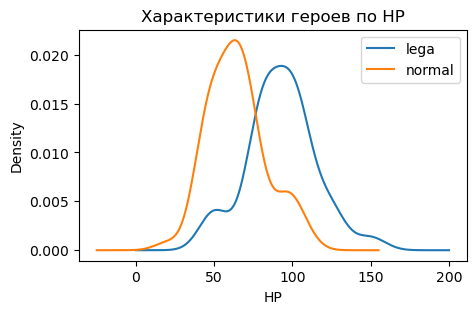

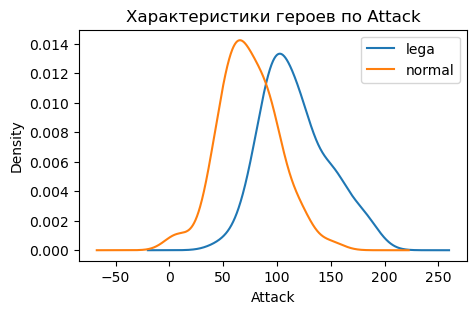

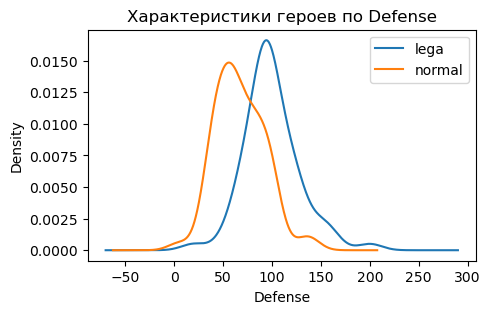

In [45]:
# Визуализируем данные. Легендарные герои имеют показатели характеристик больше чем у обыных героев

for char in characteristics:
    plt.figure(figsize=(5, 3))
    
    poke_lega[char].plot(kind='density')
    poke_norm[char].plot(kind='density')
    
    plt.title(f'Характеристики героев по {str(char)}')
    plt.xlabel(char)
    plt.legend(['lega','normal'])
    plt.show()

Вывод: Наше значение р близко к альфе, поэтому мы отвергаем нулевую гипотезу о том, что средние значения двух выборок одинаковые. То есть существует статистически значимая разница между Легендарным героем и обычным

### Задание 5
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боёв Оук выделил четыре класса best_defence_class, которые на его взгляд одинаковы по “силе обычной защиты” Defense.
Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Всё та же статистика вам в помощь!

Вы можете предположить, что распределение параметров защитных характеристик является нормальным для всех классов покемонов.

In [46]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']

In [47]:
poke_best_def_rock = pokemon.query("Class_1 == 'Rock' & Class_2 != ['Ground', 'Steel', 'Ice']\
                                  | Class_2 == 'Rock' & Class_1 != ['Ground', 'Steel', 'Ice']")
len(poke_best_def_rock)

41

In [48]:
poke_best_def_ground = pokemon.query("Class_1 == 'Ground' & Class_2 != ['Rock', 'Steel', 'Ice']\
                                    | Class_2 == 'Ground' & Class_1 != ['Rock', 'Steel', 'Ice']")
len(poke_best_def_ground)

52

In [49]:
poke_best_def_steel = pokemon.query("Class_1 == 'Steel' & Class_2 != ['Rock', 'Ground', 'Ice']\
                                   | Class_2 == 'Steel' & Class_1 != ['Rock', 'Ground', 'Ice']")
len(poke_best_def_steel)

40

In [50]:
poke_best_def_ice = pokemon.query("Class_1 == 'Ice' & Class_2 != ['Rock', 'Ground', 'Steel']\
                                 | Class_2 == 'Ice' & Class_1 != ['Rock', 'Ground', 'Steel']")
len(poke_best_def_ice)

33

In [51]:
n_poke_ = []
n_poke_.append(poke_best_def_ice)
n_poke_.append(poke_best_def_steel)
n_poke_.append(poke_best_def_ground)
n_poke_.append(poke_best_def_rock)

len(n_poke_)

4

In [52]:
# Мы отсортировали ДФ по нужным классам и объединили в один ДФ

n_poke_f_anova = pd.concat(n_poke_)
n_poke_f_anova.head()

,Name,Class_1,Class_2,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Legendary
94,Dewgong,Water,Ice,90,70,80,70,95,70,False
98,Cloyster,Water,Ice,50,95,180,85,45,70,False
133,Jynx,Ice,Psychic,65,50,35,115,95,95,False
142,Lapras,Water,Ice,130,85,80,85,95,60,False
156,Articuno,Ice,Flying,90,85,100,95,125,85,True


In [53]:
# Групп больше 3, используем тест ANOVA - однофакторный дисперсионный анализ

stat, p = st.f_oneway(poke_best_def_ground.Defense, poke_best_def_ice.Defense\
                    , poke_best_def_rock.Defense, poke_best_def_steel.Defense)

print (f'Статистика= {stat: .4f}, p= {p: .4f}')

# H0 : (нулевая гипотеза) Группы равны.
# H1 : (альтернативная гипотеза) Группы не равны.


if p > 0.05:
    print('Не отклоняем нулевую гипотезу, группы равны ' )
else:
    print('Отклоняем нулевую гипотезу, группы не равны' )

Статистика=  8.8204, p=  0.0000
Отклоняем нулевую гипотезу, группы не равны


Вывод: Наше значение р близко к нулю, поэтому мы отвергаем нулевую гипотезу о том, что "сила обычной атаки" у групп 'Rock', 'Ground', 'Steel', 'Ice' одинаковые. То есть существует статистически значимая разница между группой\группами 

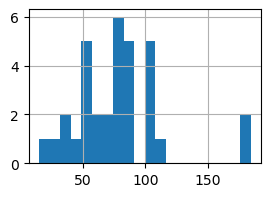

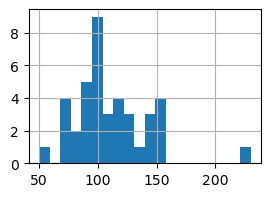

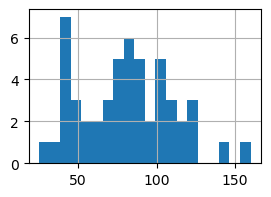

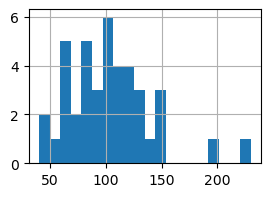

In [54]:
for poke in n_poke_:
    plt.figure(figsize=(3,2))
    poke.Defense.hist(bins=20)
    plt.show()